In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-dataset-for-clustering/wine-clustering.csv
/kaggle/input/wine-complete/wine.data


# About Dataset

**This is a public dataset on Kaggle and can be found on this link: https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering**

This dataset is adapted from the Wine Data Set from https://archive.ics.uci.edu/ml/datasets/wine by removing the information about the types of wine for unsupervised learning.

The following descriptions are adapted from the UCI webpage:

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The attributes are:

* Alcohol
* Malic acid
* Ash
* Alcalinity of ash
* Magnesium
* Total phenols
* Flavanoids
* Nonflavanoid phenols
* Proanthocyanins
* Color intensity
* Hue
* OD280/OD315 of diluted wines
* Proline

# Dataset loading

In [2]:
df = pd.read_csv('/kaggle/input/wine-dataset-for-clustering/wine-clustering.csv')
df.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

# Exploratory Data Analysis (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


As we can see above, this a very little dataset, with only 178 entries.

Fortunately, we don't have any missing values in the data, and all features are numeric.

In [4]:
df.describe()

Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color_Intensity         Hue       OD280      Proline  
count       178.000000  178.000000  178.000000   178.000000  
mean          5.058090    0.957449    2.611685   746.893258  
std           2.318286    0.228572    0.709990   314.907474  
min           1.280000    0.480000    1.270000   278.000000  
25%           3.220000    0.782500    1.937500   500.500000  
50%           4.690000    0.965000    2.780000   673.500000  
75%           6.200000    1.120000    3.170000   985.000000  
max          13.000000    1.710000    4.000000  1680.000000

The data have different scales, since it is a clustering problem, we will need to standardize the data before fitting the algorithm.

As the StandardScaler from sklearn is sensitive to outliers, we need to check it first.

From the quartiles above, the columns that does not seem to be in the form of a normal distribution or have an outlier are: "Malic_Acid", "Ash", "Ash_Alcanity", "Magnesium", "Flavanoids", "Proanthocyanis", "Color_Intensity", "Proline".

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


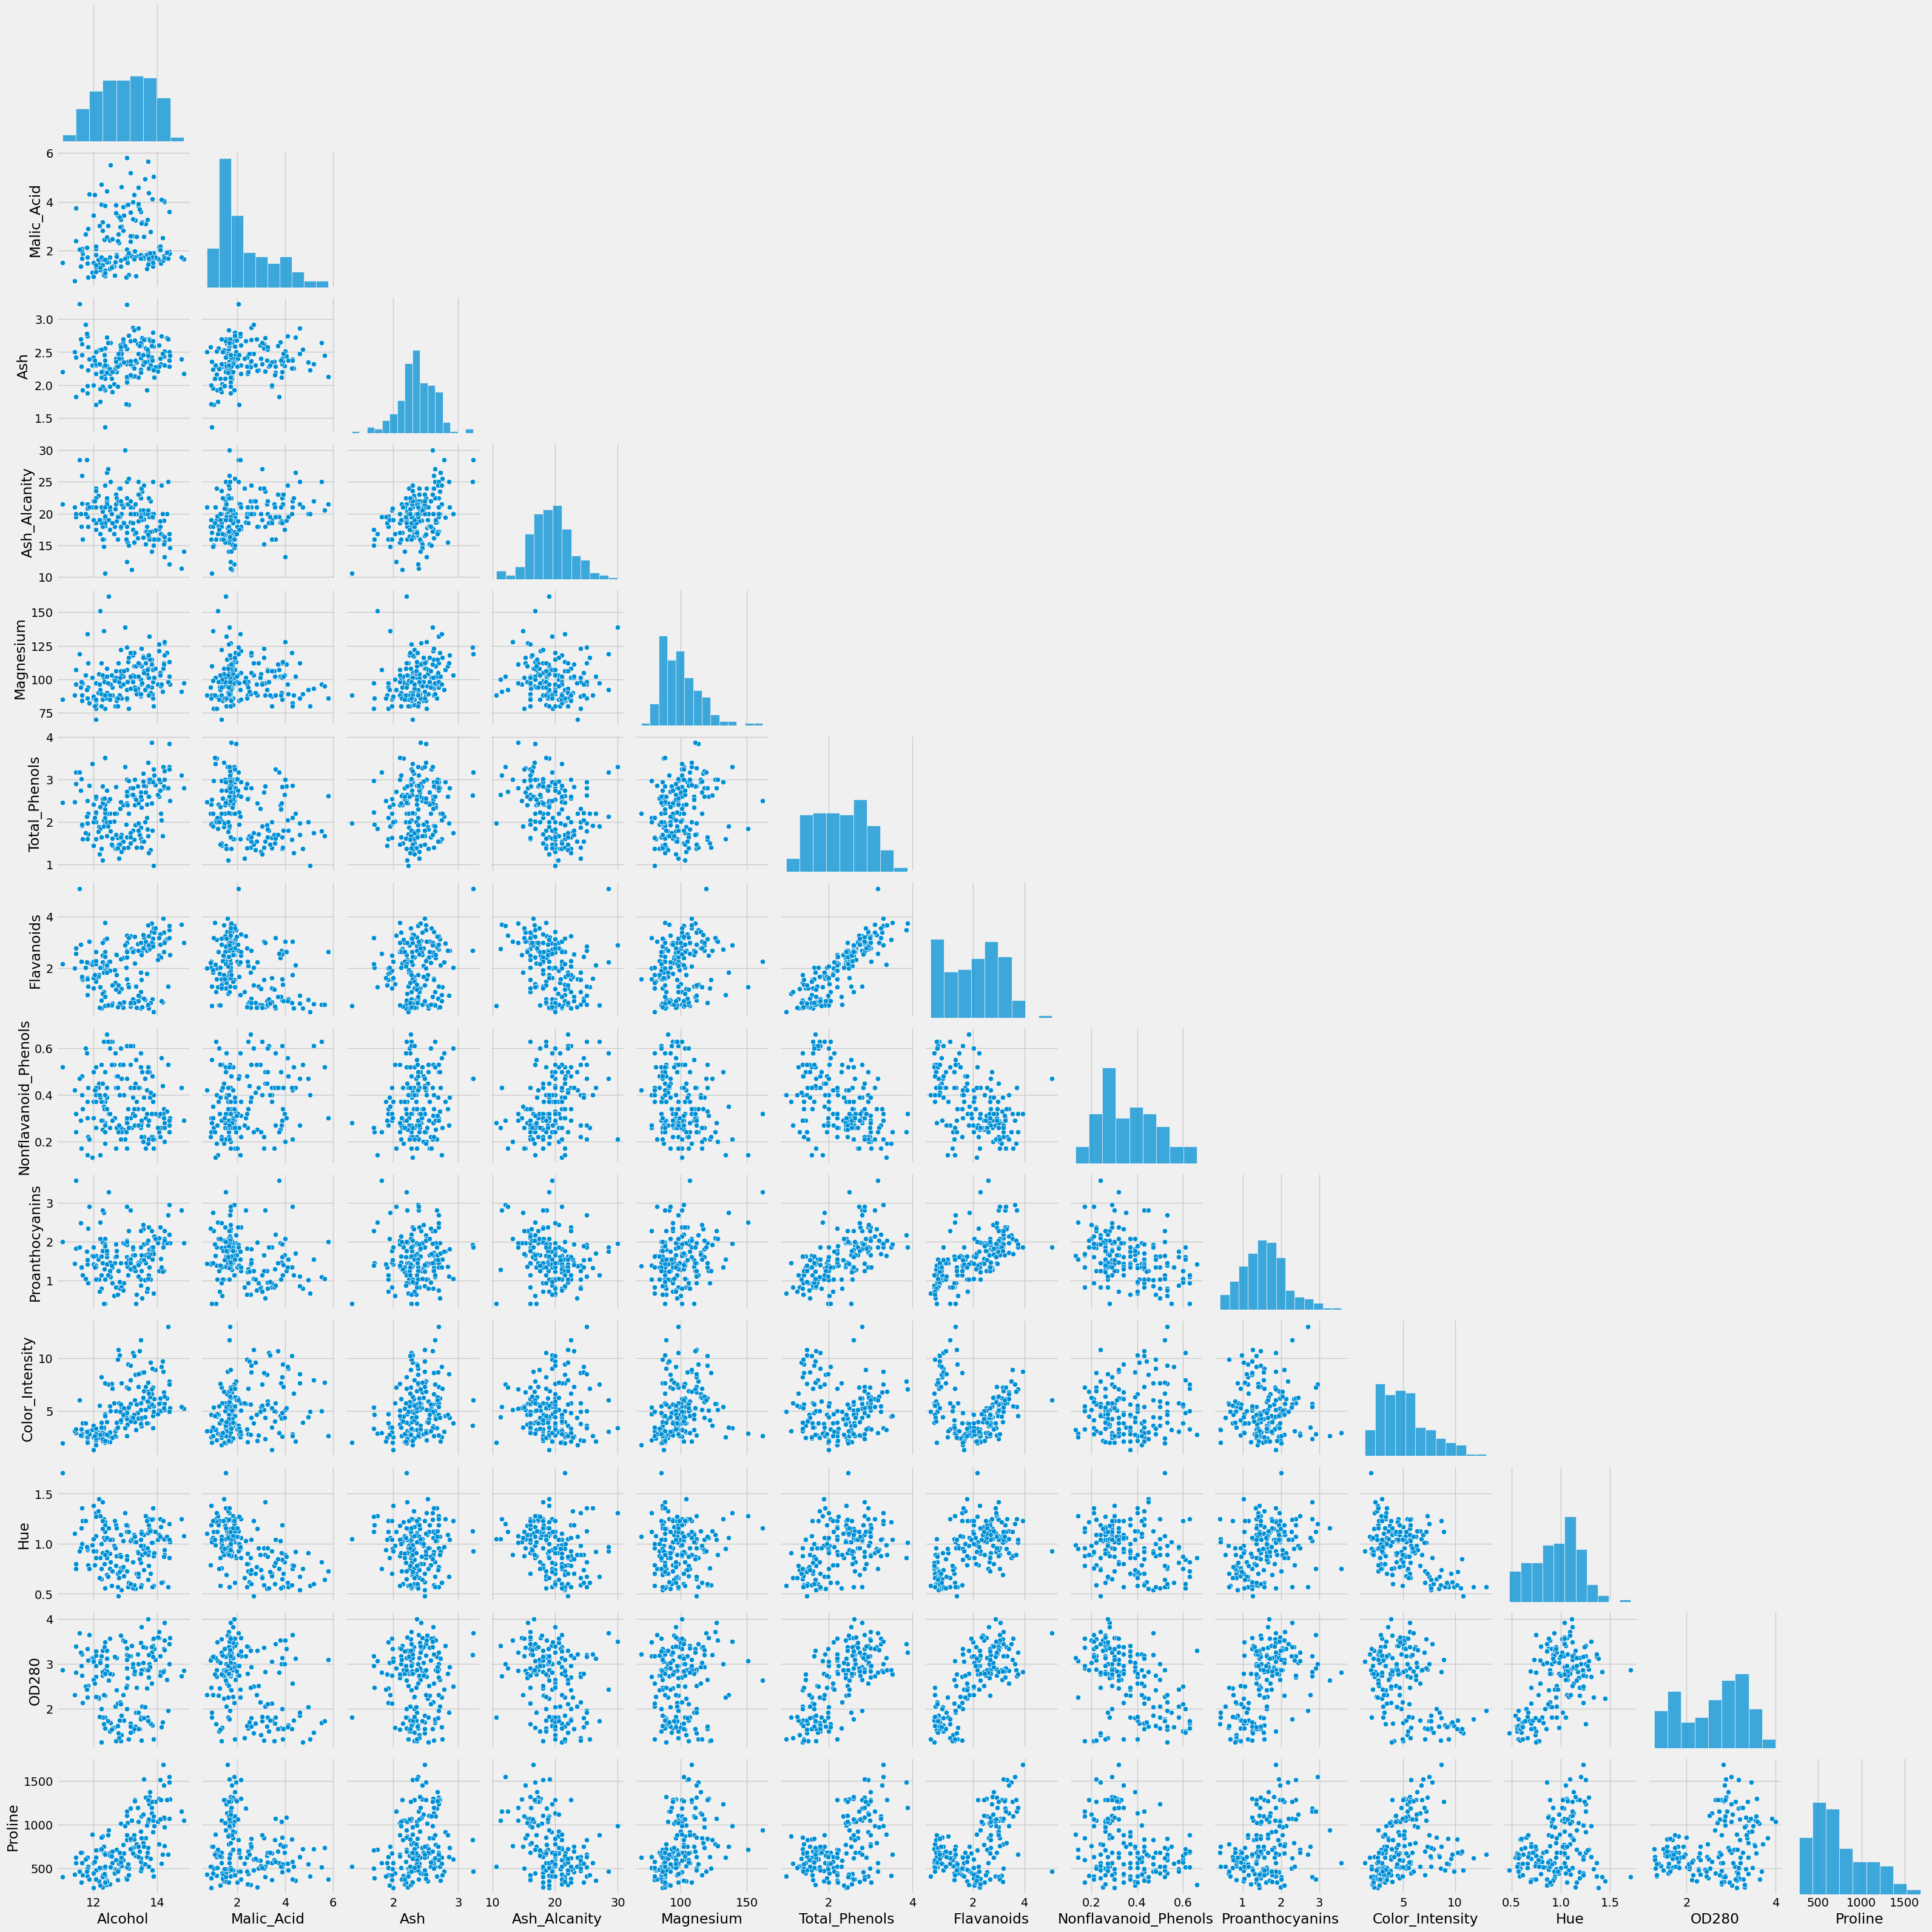

In [5]:
sns.pairplot(df, corner=True)
plt.show()

With the pairplot above we could confirm that most of the columns does not have a normal distribution, in addition we could identify possible outliers in the columns:
* Ash
* Magnesium
* Flavanoids
* Proanthocyanis
* Color_Intensity
* Hue

We can also see strong correlations between some features like "Flavanoids" and "OD280" for example, lets explore it...

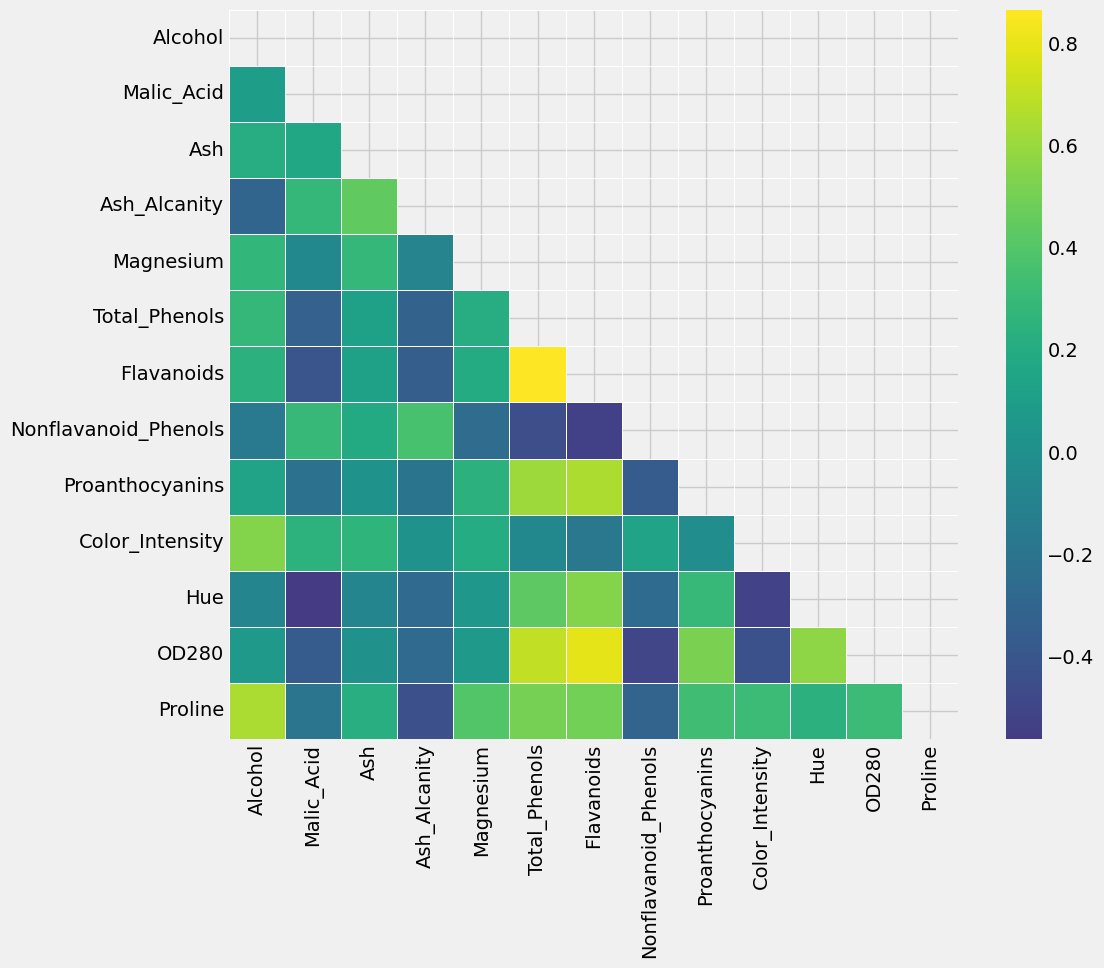

In [6]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr, mask=mask, cmap='viridis', center=0,
            square=True, linewidths=.5)
plt.show()

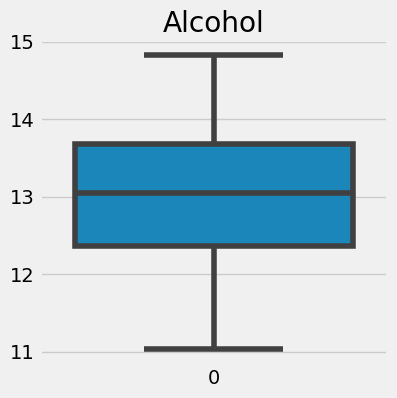

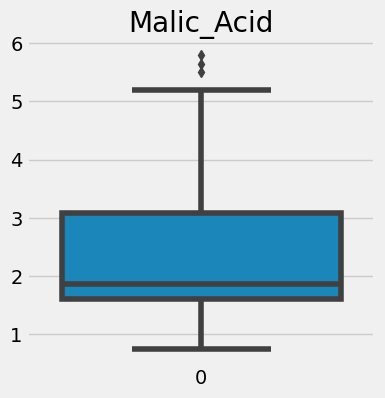

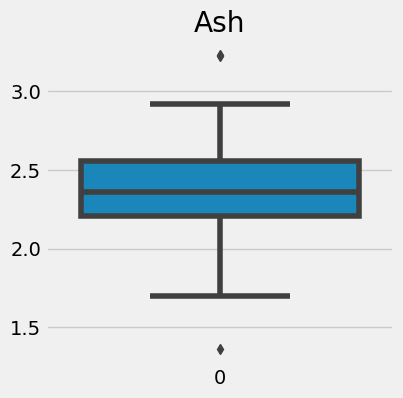

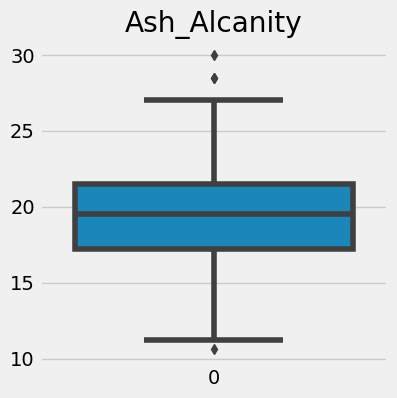

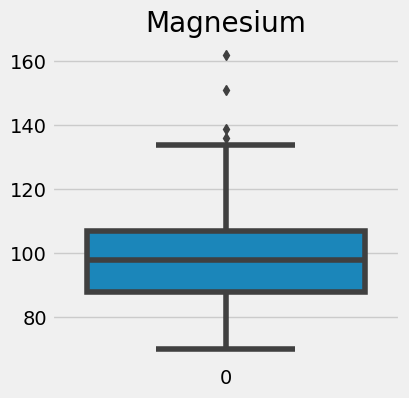

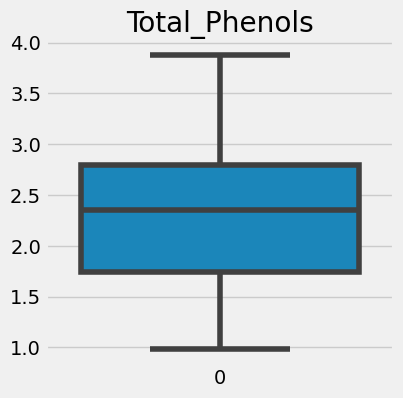

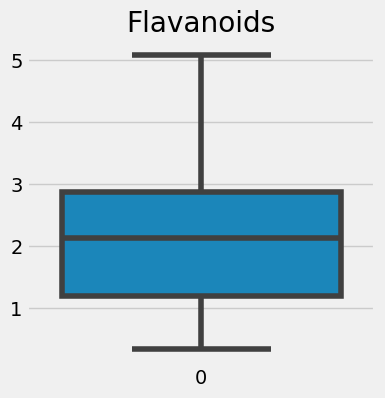

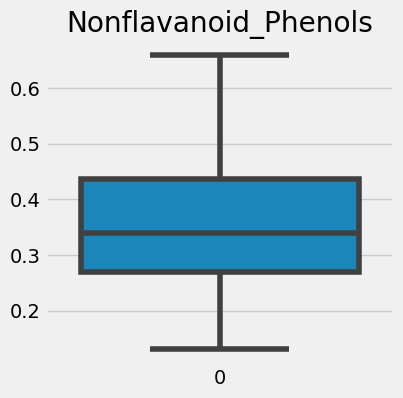

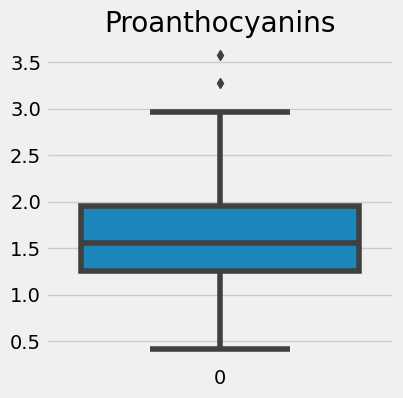

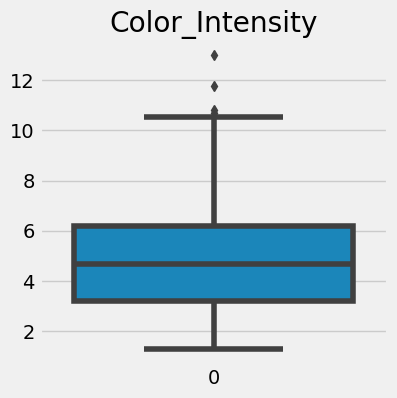

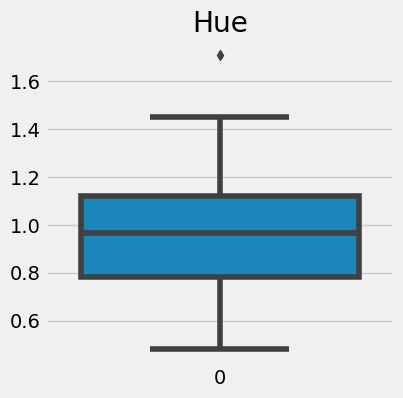

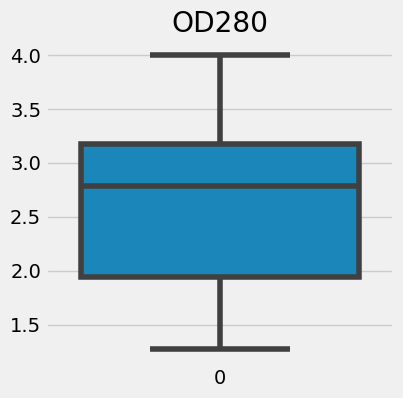

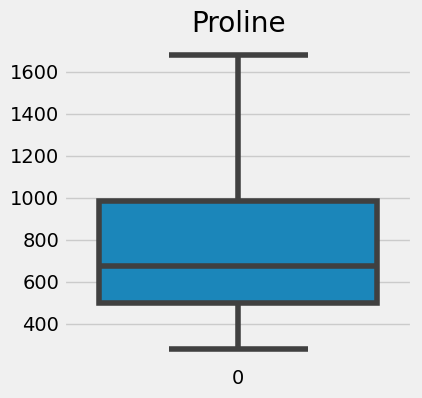

In [7]:
for column in df:
    f = plt.figure(figsize=(4,4))
    sns.boxplot(df[column])
    plt.title(column)
    plt.show()

The features that we identified with outliers before are:
* Ash
* Magnesium
* Flavanoids
* Proanthocyanis
* Color_Intensity
* Hue

The features identified with outliers by the boxplot are:
* Malic_Acid
* Ash_Alcanity
* Ash
* Magnesium
* Flavanoids
* Proanthocyanis
* Color_Intensity
* Hue

And the boxplot does **not** identified outliers in "**Flavanoids**" as we previewd.

In [8]:
from scipy import stats

np.abs(stats.zscore(df)).describe()

Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean     0.850433    0.826099    0.764728      0.779240    0.772294   
std      0.527567    0.565115    0.646171      0.628494    0.637058   
min      0.013116    0.021231    0.012732      0.001518    0.018145   
25%      0.411107    0.472483    0.286061      0.298767    0.262708   
50%      0.821451    0.665481    0.608676      0.615584    0.737240   
75%      1.180060    1.087811    1.109334      1.049479    1.035055   
max      2.434235    3.109192    3.679162      3.154511    4.371372   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        0.859312    0.862285              0.843623         0.781242   
std         0.512895    0.507853              0.538450         0.625989   
min         0.007832    0.000733              0.065639         0.033467   
25%         0.472868    0.453562              0.468530         0.313800   
50%         0.817369    0.844065              0.740141         0.629175   
75%         1.153589    1.272161              1.223610         1.136049   
max         2.539515    3.062832              2.402403         3.485073   

       Color_Intensity         Hue       OD280     Proline  
count       178.000000  178.000000  178.000000  178.000000  
mean          0.794126    0.819779    0.864046    0.825842  
std           0.609468    0.574295    0.504834    0.565492  
min           0.003499    0.011190    0.025868    0.009893  
25%           0.286833    0.362177    0.422543    0.376226  
50%           0.735369    0.713164    0.830961    0.777016  
75%           1.093734    1.211891    1.268858    1.124752  
max           3.435432    3.301694    1.960915    2.971473

We can see a pattern that for every column that the boxplot pointed having outliers, we have a maximum Z-Score value above 3 (it means that some data point have a value 3x standard deviation from the mean). In addition to that, the column "Flavanoids" have a value above 3, indicating that it also have an outlier.

Now let's see how many data points we have in the dataframe which Z-Score is above 3

In [9]:
outliers_mask = (np.abs(stats.zscore(df)) > 3)

outliers = df[outliers_mask.any(axis=1)]

print(len(outliers))

10


In [10]:
outliers

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
25     13.05        2.05  3.22          25.0        124           2.63   
59     12.37        0.94  1.36          10.6         88           1.98   
69     12.21        1.19  1.75          16.8        151           1.85   
73     12.99        1.67  2.60          30.0        139           3.30   
95     12.47        1.52  2.20          19.0        162           2.50   
110    11.46        3.74  1.82          19.5        107           3.18   
115    11.03        1.51  2.20          21.5         85           2.46   
121    11.56        2.05  3.23          28.5        119           3.18   
123    13.05        5.80  2.13          21.5         86           2.62   
158    14.34        1.68  2.70          25.0         98           2.80   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
25         2.68                  0.47             1.92             3.58  1.13   
59         0.57                  0.28             0.42             1.95  1.05   
69         1.28                  0.14             2.50             2.85  1.28   
73         2.89                  0.21             1.96             3.35  1.31   
95         2.27                  0.32             3.28             2.60  1.16   
110        2.58                  0.24             3.58             2.90  0.75   
115        2.17                  0.52             2.01             1.90  1.71   
121        5.08                  0.47             1.87             6.00  0.93   
123        2.65                  0.30             2.01             2.60  0.73   
158        1.31                  0.53             2.70            13.00  0.57   

     OD280  Proline  
25    3.20      830  
59    1.82      520  
69    3.07      718  
73    3.50      985  
95    2.63      937  
110   2.81      562  
115   2.87      407  
121   3.69      465  
123   3.10      380  
158   1.96      660

In [11]:
outliers_mask.sum(axis=0).sort_values(ascending=False)

Ash                     3
Magnesium               2
Malic_Acid              1
Ash_Alcanity            1
Flavanoids              1
Proanthocyanins         1
Color_Intensity         1
Hue                     1
Alcohol                 0
Total_Phenols           0
Nonflavanoid_Phenols    0
OD280                   0
Proline                 0
dtype: int64

In [12]:
print(round(10 / 178 * 100,2),'%')

5.62 %


From the values above, we could see that we have 11 outliers in 10 rows, representing 5,62% of the data.

So the next steps are data preprocessing, in which I will create a model for the situation where we keep the outliers, and the situation where we remove them.

# Data preprocessing

## Without outliers

In [13]:
non_outliers = df.loc[~outliers_mask.any(axis=1)].copy()

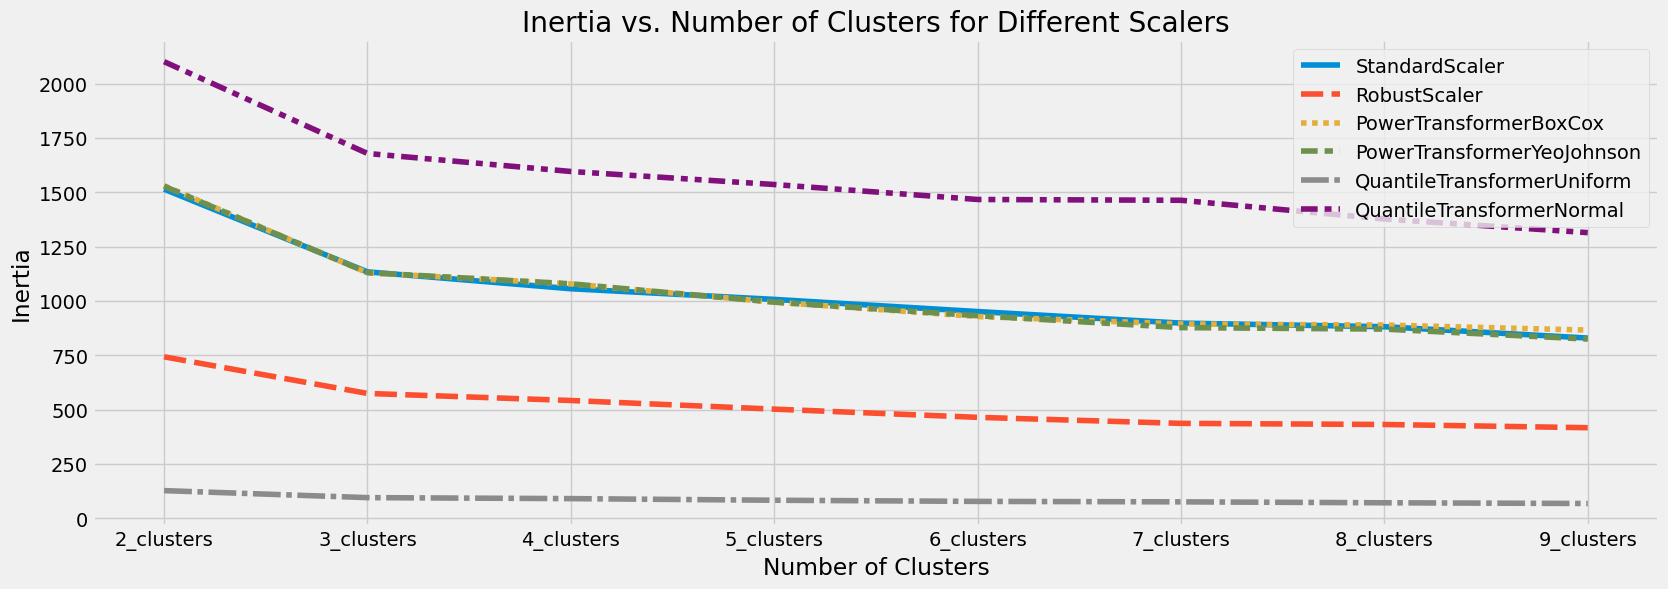

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer, QuantileTransformer
from sklearn.cluster import KMeans

scalers = {
    'StandardScaler': StandardScaler(),
    'RobustScaler': RobustScaler(),
    'PowerTransformerBoxCox': PowerTransformer(method='box-cox'),
    'PowerTransformerYeoJohnson': PowerTransformer(method='yeo-johnson'),
    'QuantileTransformerUniform': QuantileTransformer(n_quantiles=len(non_outliers), output_distribution='uniform'),
    'QuantileTransformerNormal': QuantileTransformer(n_quantiles=len(non_outliers), output_distribution='normal')
}

inertia = {name: [] for name in scalers}
clusters = {name: [] for name in scalers}

for i in range(2, 10):
    for name, scaler in scalers.items():
        pipe = Pipeline(steps=[
            ('scaler', scaler),
            ('model', KMeans(n_clusters=i, n_init='auto', random_state=3))
        ])
        pipe.fit(non_outliers)
        inertia[name].append(pipe['model'].inertia_)
        clusters[name].append(pipe.predict(non_outliers))

index = [f'{i}_clusters' for i in range(2, 10)]
inertia_scalers = pd.DataFrame(data=inertia, index=index)
clusters_df = pd.DataFrame(data=clusters, index=index)

plt.figure(figsize=(18, 6))
sns.lineplot(data=inertia_scalers)
plt.title('Inertia vs. Number of Clusters for Different Scalers')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

From the code above, we can see that the best scalers were "RobustScaler", and "QuantileTransformer" using the "uniform" output distribution for the inertia elbow, also, the best value for the number of clusters is 3, which is clear to observe in almost all scalers, with exception of the "QuantilerTransformer" using the "uniform" output distribution.

In [15]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = range(2, 5)

def plot_silhouette(ax, df, cluster_labels, n_clusters, scaler_name):
    ax.set_xlim([-1, 1])
    ax.set_ylim([0, len(df) + (n_clusters + 1) * 10])

    silhouette_avg = silhouette_score(df, cluster_labels)
    sample_silhouette_values = silhouette_samples(df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax.set_title(f"{scaler_name}")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

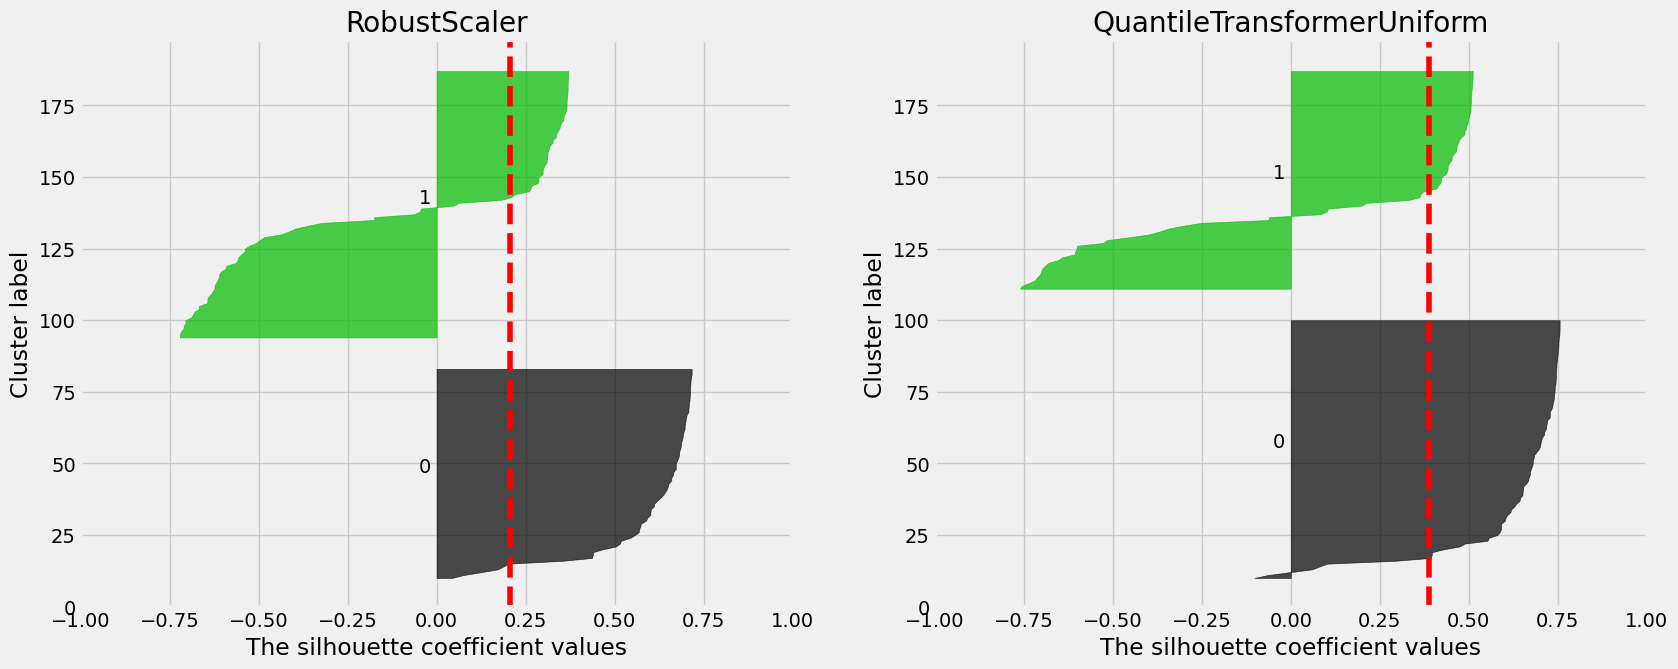

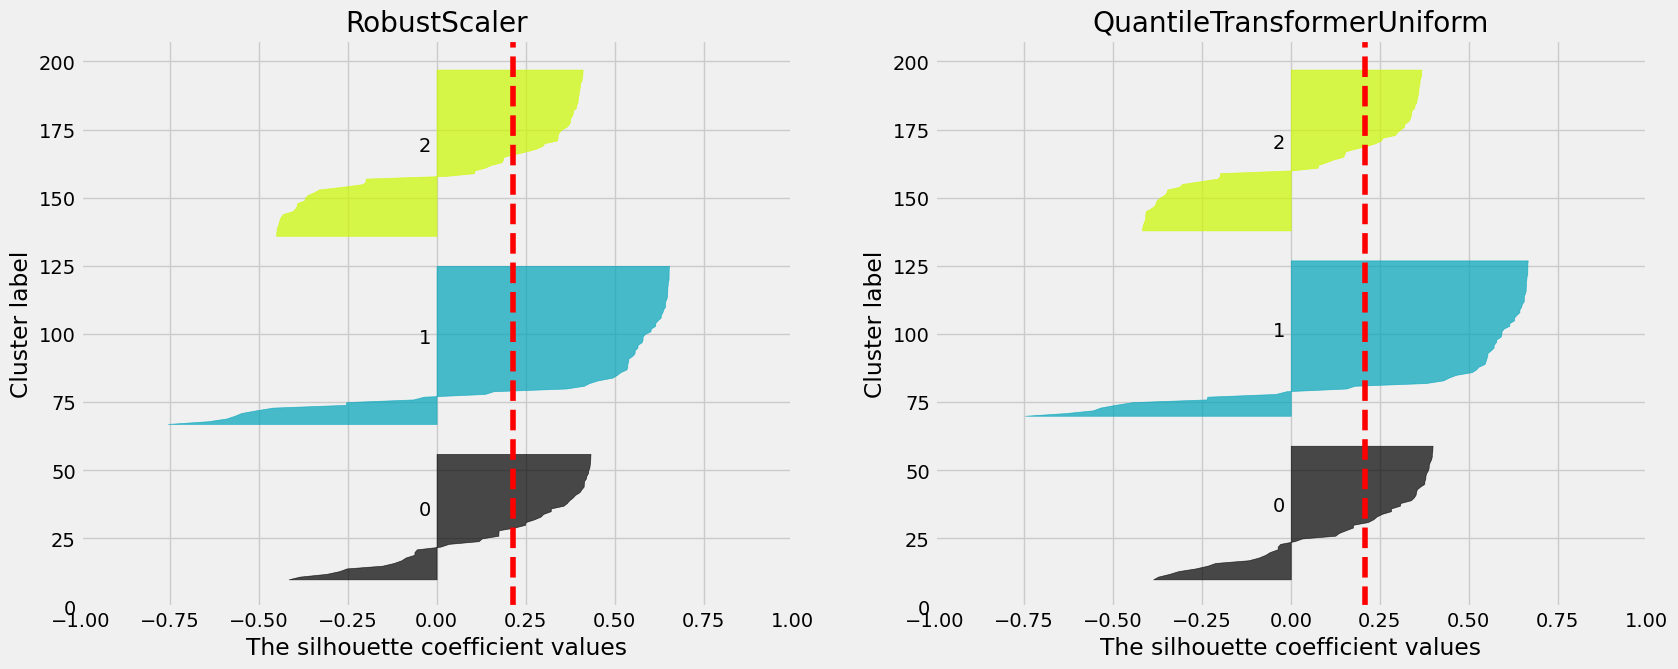

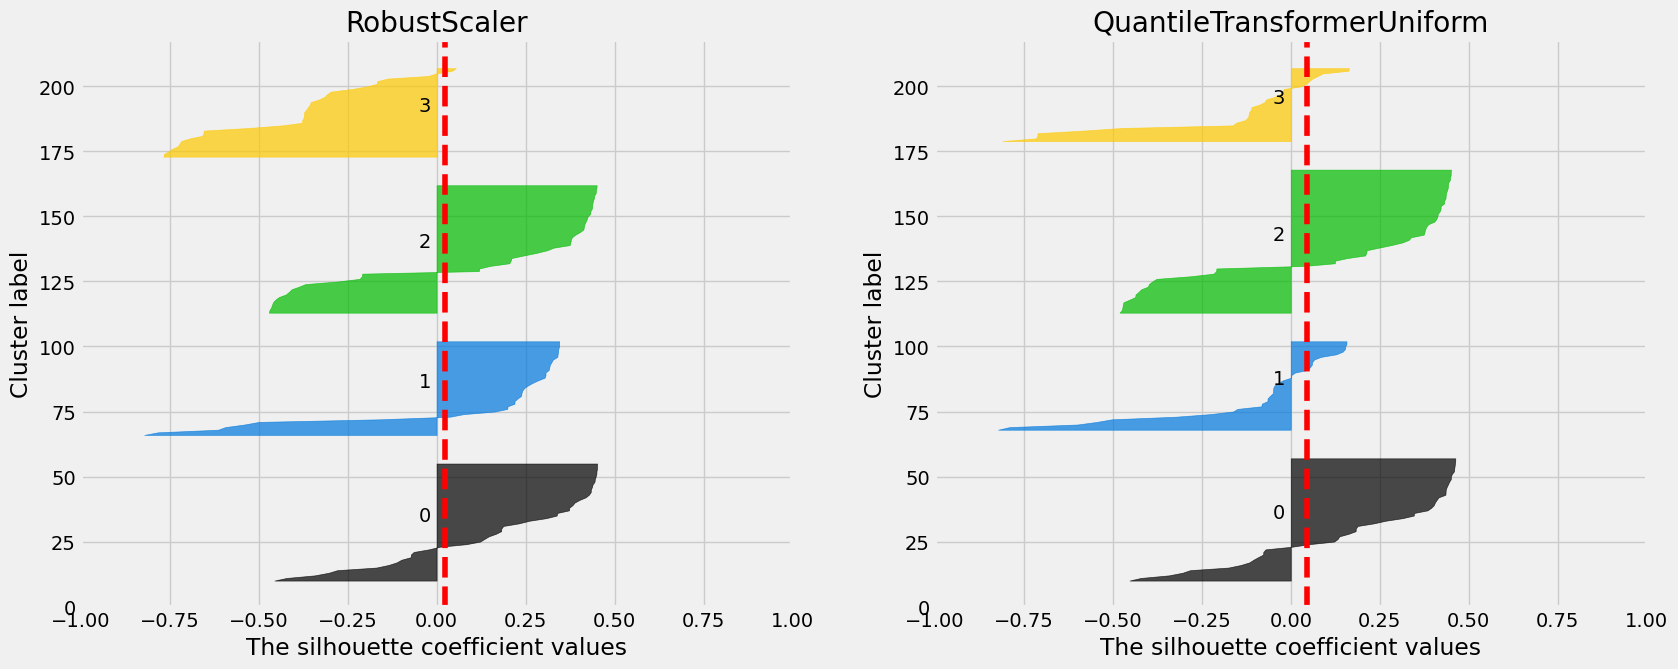

In [16]:
for n_clusters in range_n_clusters:
    # Create subplots
    fig, axs = plt.subplots(1, 2, figsize=(18, 7))

    for ax, (scaler_name, cluster_labels) in zip(axs, clusters_df[['RobustScaler','QuantileTransformerUniform']].items()):
        cluster_labels = cluster_labels.loc[f'{n_clusters}_clusters']
        plot_silhouette(ax, non_outliers, cluster_labels, n_clusters, scaler_name)

    plt.show()

With the silhouette analysis we were able to identify that the best average silhouette score was generated by the "QuantileTransformer" using "Uniform"output distribution with 2 clusters. But since the inertia elbow was clear that 3 is the ideal number, we should pick it.

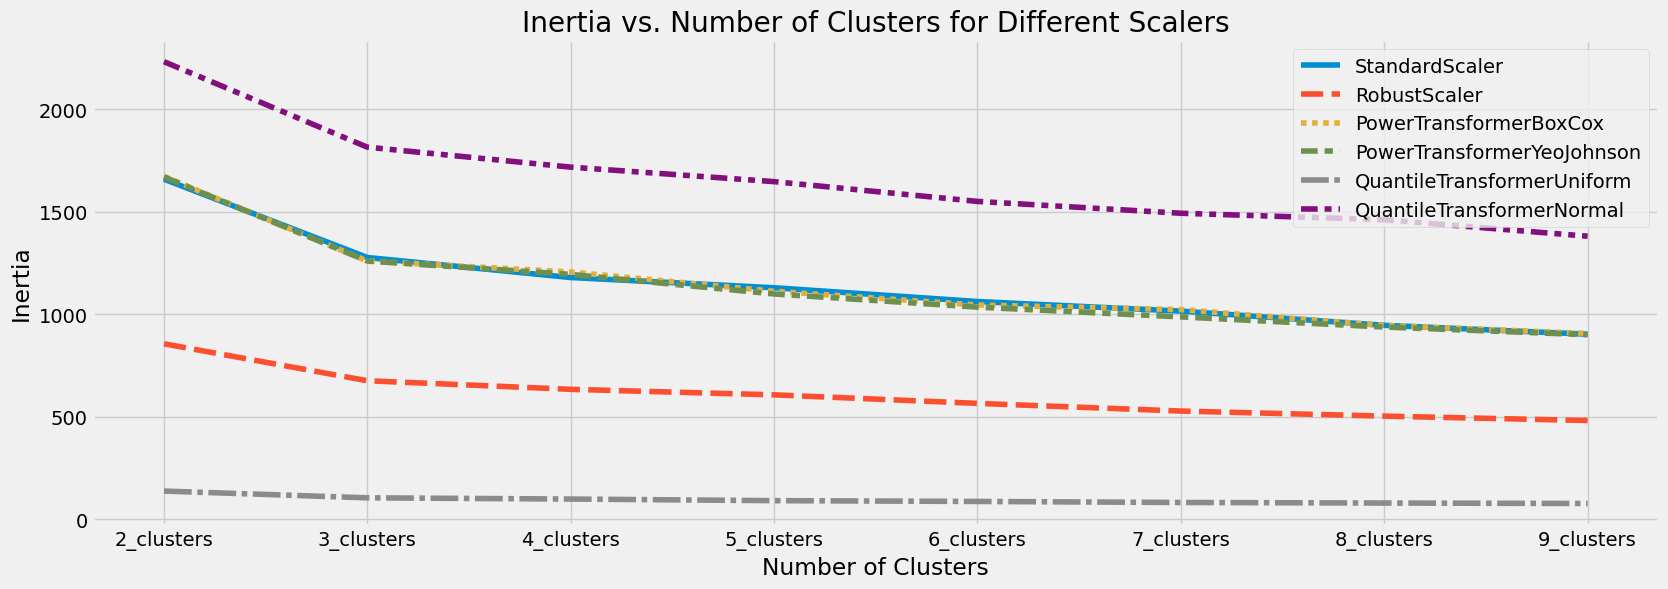

In [17]:
inertia = {name: [] for name in scalers}
clusters = {name: [] for name in scalers}

for i in range(2, 10):
    for name, scaler in scalers.items():
        pipe = Pipeline(steps=[
            ('scaler', scaler),
            ('model', KMeans(n_clusters=i, n_init='auto', random_state=3))
        ])
        pipe.fit(df)
        inertia[name].append(pipe['model'].inertia_)
        clusters[name].append(pipe.predict(df))

index = [f'{i}_clusters' for i in range(2, 10)]
inertia_scalers = pd.DataFrame(data=inertia, index=index)
clusters_df = pd.DataFrame(data=clusters, index=index)

plt.figure(figsize=(18, 6))
sns.lineplot(data=inertia_scalers)
plt.title('Inertia vs. Number of Clusters for Different Scalers')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

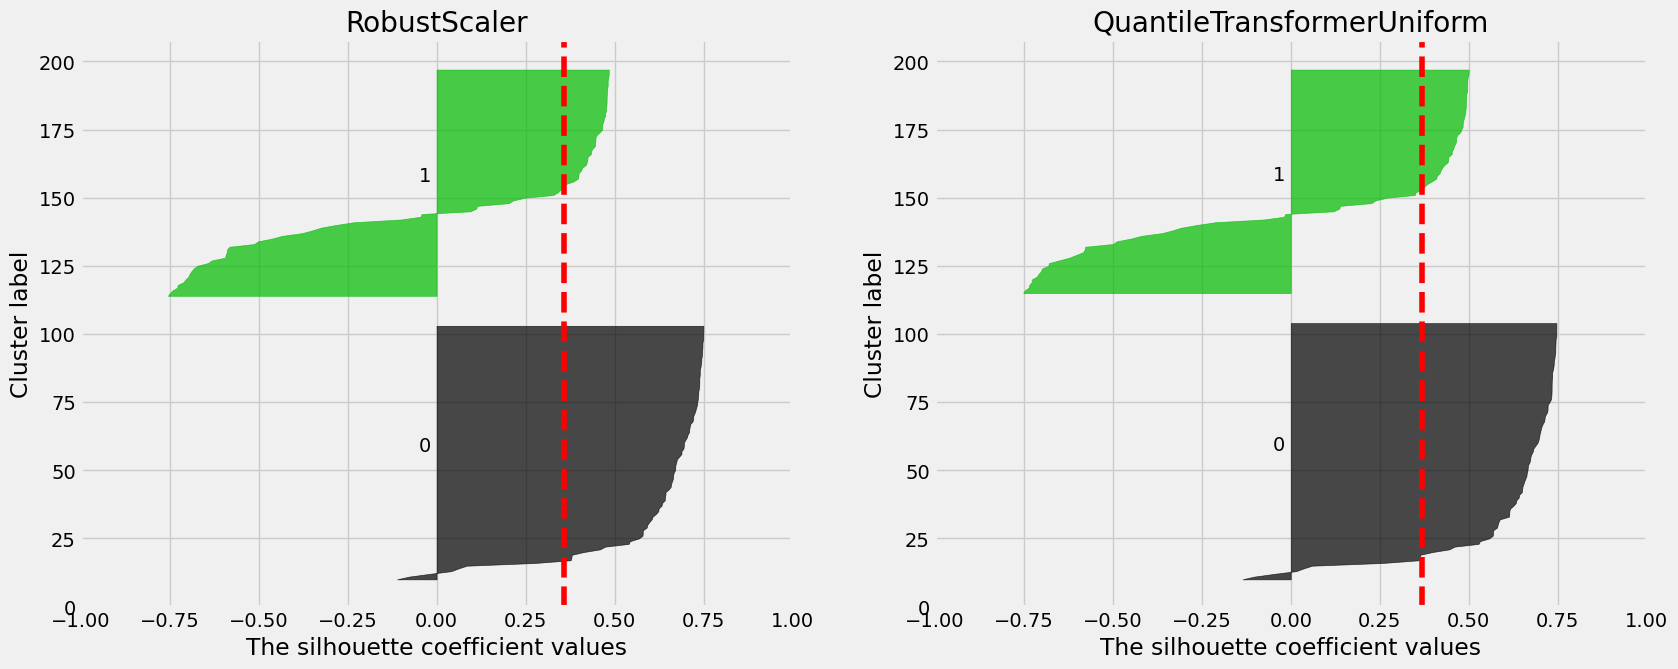

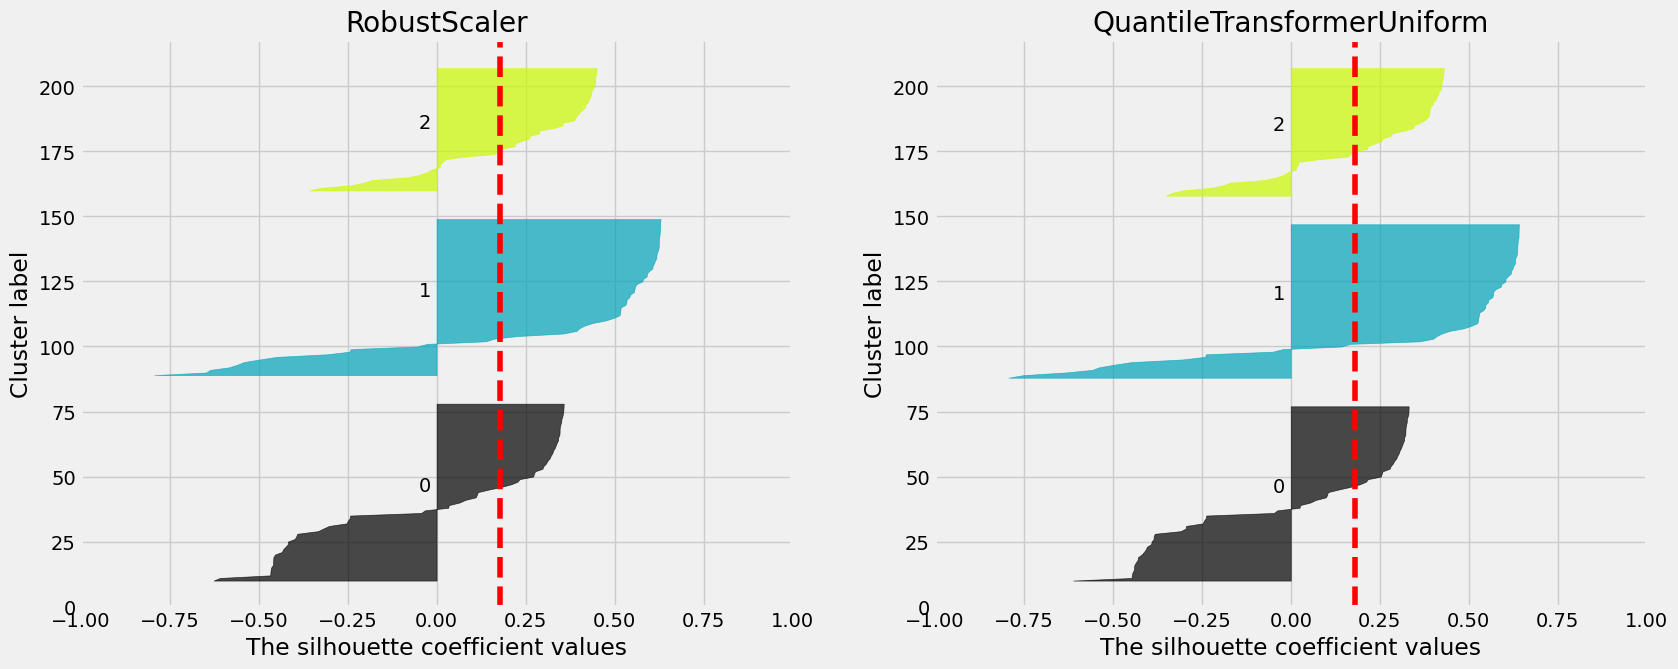

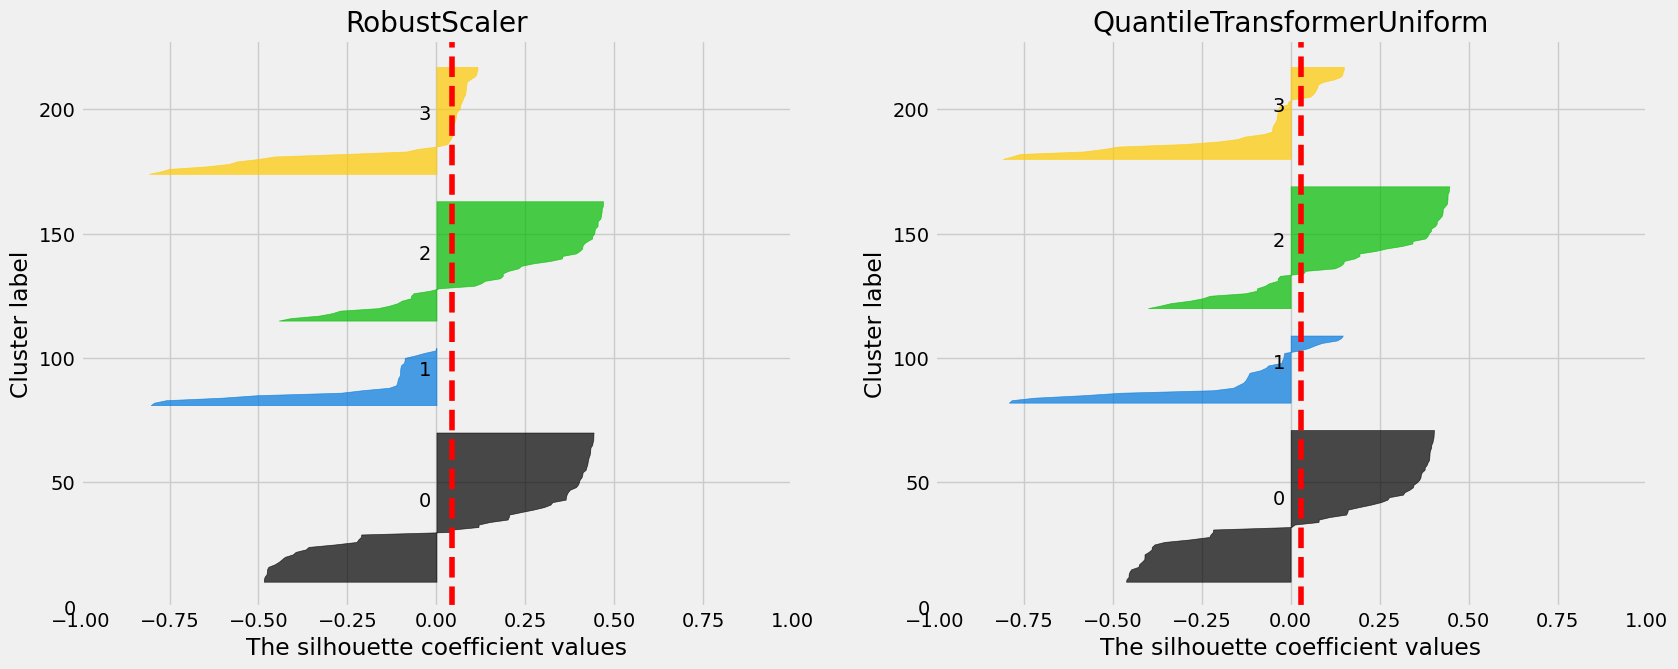

In [18]:
for n_clusters in range_n_clusters:
    # Create subplots
    fig, axs = plt.subplots(1, 2, figsize=(18, 7))

    for ax, (scaler_name, cluster_labels) in zip(axs, clusters_df[['RobustScaler','QuantileTransformerUniform']].items()):
        cluster_labels = cluster_labels.loc[f'{n_clusters}_clusters']
        plot_silhouette(ax, df, cluster_labels, n_clusters, scaler_name)

    plt.show()


By using the hole dataset (wihtout removing the outliers), we could obtain an approximate, yet worst result, showing how important it is to remove the outliers from our analysis.

# Final Model

In [19]:
pipe = Pipeline(steps=[
        ('scaler', QuantileTransformer(n_quantiles=len(non_outliers), output_distribution='uniform')),
        ('model', KMeans(n_clusters=3, n_init=10, random_state=3))
    ])
pipe.fit(non_outliers)
clusters = pipe.predict(non_outliers)
non_outliers['cluster'] = clusters

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


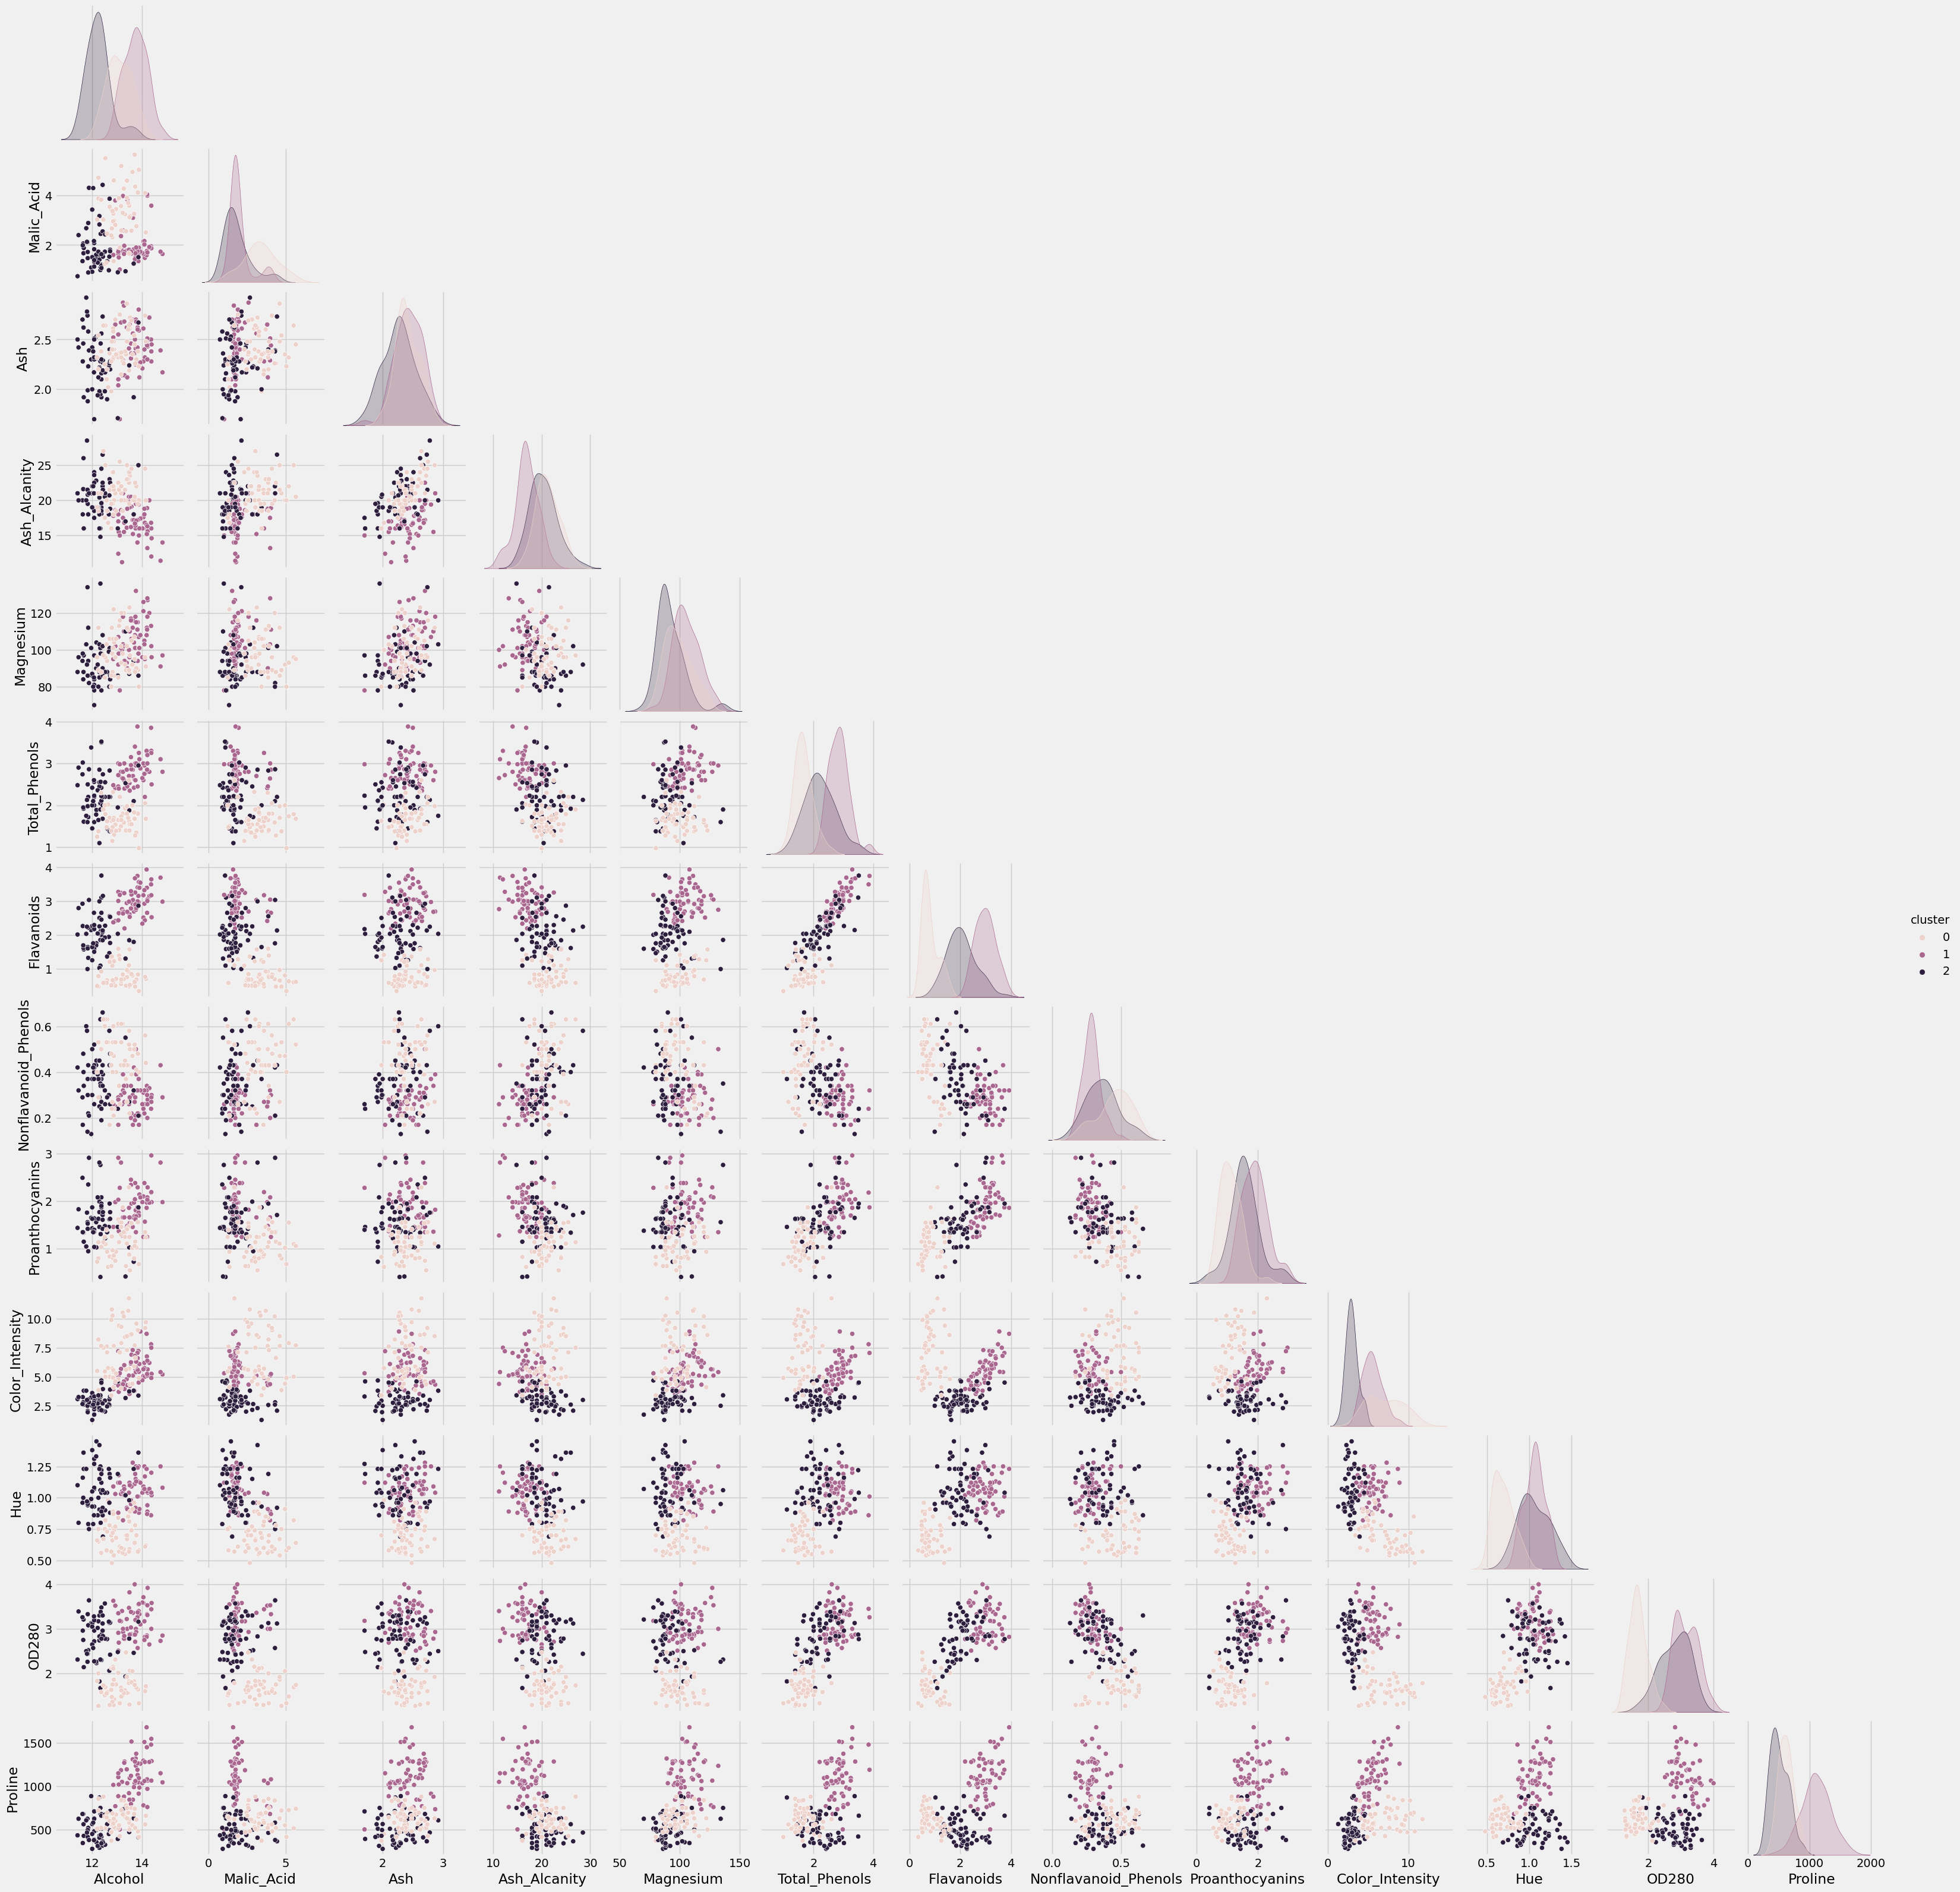

In [20]:
sns.pairplot(non_outliers, corner=True, hue='cluster')
plt.show()

From the graph above, we could see that most of our columns does not has a good separation of the clusters, that is the reason that our silhouette analysis had bad results, it is easy to see some data points overlapping each other's clusters.

In [21]:
complete = pd.read_csv('/kaggle/input/wine-complete/wine.data', names=df.columns.tolist()).reset_index()
complete.rename({'index':'cluster'}, inplace=True, axis=1)
complete.head()

cluster  Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0        1    14.23        1.71  2.43          15.6        127           2.80   
1        1    13.20        1.78  2.14          11.2        100           2.65   
2        1    13.16        2.36  2.67          18.6        101           2.80   
3        1    14.37        1.95  2.50          16.8        113           3.85   
4        1    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

In [22]:
complete.describe()

cluster     Alcohol  Malic_Acid         Ash  Ash_Alcanity  \
count  178.000000  178.000000  178.000000  178.000000    178.000000   
mean     1.938202   13.000618    2.336348    2.366517     19.494944   
std      0.775035    0.811827    1.117146    0.274344      3.339564   
min      1.000000   11.030000    0.740000    1.360000     10.600000   
25%      1.000000   12.362500    1.602500    2.210000     17.200000   
50%      2.000000   13.050000    1.865000    2.360000     19.500000   
75%      3.000000   13.677500    3.082500    2.557500     21.500000   
max      3.000000   14.830000    5.800000    3.230000     30.000000   

        Magnesium  Total_Phenols  Flavanoids  Nonflavanoid_Phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000    0.340000              0.130000   
25%     88.000000       1.742500    1.205000              0.270000   
50%     98.000000       2.355000    2.135000              0.340000   
75%    107.000000       2.800000    2.875000              0.437500   
max    162.000000       3.880000    5.080000              0.660000   

       Proanthocyanins  Color_Intensity         Hue       OD280      Proline  
count       178.000000       178.000000  178.000000  178.000000   178.000000  
mean          1.590899         5.058090    0.957449    2.611685   746.893258  
std           0.572359         2.318286    0.228572    0.709990   314.907474  
min           0.410000         1.280000    0.480000    1.270000   278.000000  
25%           1.250000         3.220000    0.782500    1.937500   500.500000  
50%           1.555000         4.690000    0.965000    2.780000   673.500000  
75%           1.950000         6.200000    1.120000    3.170000   985.000000  
max           3.580000        13.000000    1.710000    4.000000  1680.000000

In [23]:
no_outliers_complete = complete.loc[~outliers_mask.any(axis=1)].copy()
X = no_outliers_complete.drop('cluster', axis=1)

pipe = Pipeline(steps=[
        ('scaler', QuantileTransformer(n_quantiles=len(X), output_distribution='uniform')),
        ('model', KMeans(n_clusters=3, n_init=10, random_state=3))
    ])
no_outliers_complete['predicted'] = pipe.fit_predict(X)
no_outliers_complete.loc[no_outliers_complete['predicted'] == 0, 'predicted'] = 3 # Adjusting range of labels accordingly
no_outliers_complete.head()

cluster  Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0        1    14.23        1.71  2.43          15.6        127           2.80   
1        1    13.20        1.78  2.14          11.2        100           2.65   
2        1    13.16        2.36  2.67          18.6        101           2.80   
3        1    14.37        1.95  2.50          16.8        113           3.85   
4        1    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  predicted  
0   3.92     1065          1  
1   3.40     1050          1  
2   3.17     1185          1  
3   3.45     1480          1  
4   2.93      735          1

In [24]:
no_outliers_complete.describe()

cluster     Alcohol  Malic_Acid         Ash  Ash_Alcanity  \
count  168.000000  168.000000  168.000000  168.000000    168.000000   
mean     1.934524   13.033214    2.343571    2.369226     19.361310   
std      0.790209    0.793084    1.097823    0.243202      3.118708   
min      1.000000   11.410000    0.740000    1.700000     11.200000   
25%      1.000000   12.370000    1.610000    2.230000     17.175000   
50%      2.000000   13.060000    1.870000    2.360000     19.250000   
75%      3.000000   13.695000    3.105000    2.542500     21.500000   
max      3.000000   14.830000    5.650000    2.920000     28.500000   

        Magnesium  Total_Phenols  Flavanoids  Nonflavanoid_Phenols  \
count  168.000000     168.000000  168.000000            168.000000   
mean    98.779762       2.273988    2.010298              0.362679   
std     12.560477       0.627890    0.985189              0.123940   
min     70.000000       0.980000    0.340000              0.130000   
25%     88.000000       1.700000    1.097500              0.270000   
50%     97.500000       2.265000    2.100000              0.340000   
75%    106.250000       2.800000    2.885000              0.430000   
max    136.000000       3.880000    3.930000              0.660000   

       Proanthocyanins  Color_Intensity         Hue       OD280      Proline  \
count       168.000000       168.000000  168.000000  168.000000   168.000000   
mean          1.553155         5.116726    0.951226    2.596607   752.875000   
std           0.529569         2.243267    0.220522    0.714607   319.272211   
min           0.410000         1.280000    0.480000    1.270000   278.000000   
25%           1.235000         3.292500    0.787500    1.905000   501.500000   
50%           1.505000         4.850000    0.960000    2.775000   675.000000   
75%           1.870000         6.262500    1.112500    3.170000  1016.250000   
max           2.960000        11.750000    1.450000    4.000000  1680.000000   

        predicted  
count  168.000000  
mean     1.946429  
std      0.806106  
min      1.000000  
25%      1.000000  
50%      2.000000  
75%      3.000000  
max      3.000000

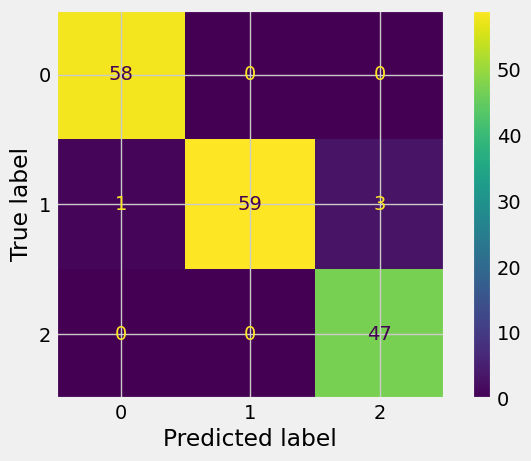

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = no_outliers_complete['cluster'].unique().tolist()
cm = confusion_matrix(no_outliers_complete['cluster'], no_outliers_complete['predicted'], labels=labels)
ConfusionMatrixDisplay(cm).plot()
plt.show()

# Conclusion

As this analysis intended to use just KMeans in order to practice what I have been learning this weeks, I focused on exploring different settings for its parameters and the impact that different scalers and outliers have in the algorithm.

The results were pretty good, as we can see above, with only 4 labels that were assigned incorrectly.

Thank you for reading it.